In [9]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import skew
%matplotlib inline

Import our class for pairwise mutual information in an alignment

In [2]:
from align_mi import AlignMI

Here are Andy's simulations:

In [3]:
ls ../simulation_study/preliminary/2_epistasis/

prop-0.25_d-0/  prop-0.5_d-0/   prop-0.75_d-0/  prop-0_d-1/     prop-1_d-5/
prop-0.25_d-1/  prop-0.5_d-1/   prop-0.75_d-1/  prop-1_d-0/
prop-0.25_d-10/ prop-0.5_d-10/  prop-0.75_d-10/ prop-1_d-1/
prop-0.25_d-2/  prop-0.5_d-2/   prop-0.75_d-2/  prop-1_d-10/
prop-0.25_d-5/  prop-0.5_d-5/   prop-0.75_d-5/  prop-1_d-2/


Load two of the simulations, one without epistasis, one with half of sites epistatic

In [4]:
mi = AlignMI('../simulation_study/preliminary/2_epistasis/prop-0_d-1/data/1.nex').mi.flatten()
mi_epi = AlignMI('../simulation_study/preliminary/2_epistasis/prop-0.5_d-10/data/1.nex').mi.flatten()

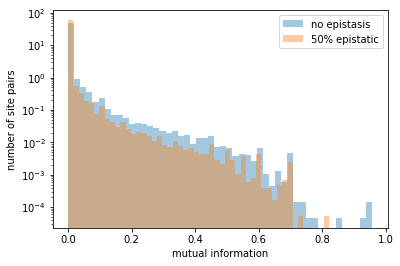

In [5]:
mi = mi[~np.isnan(mi)]
sns.distplot(mi, kde=False, label='no epistasis', norm_hist=True)
mi_epi = mi_halfepi[~np.isnan(mi_epi)]
sns.distplot(mi_epi, kde=False, label='50% epistatic', norm_hist=True)
plt.yscale('log')
plt.xlabel('mutual information')
plt.ylabel('number of site pairs')
plt.legend()
plt.show()

In [6]:
skew(mi)

10.153419402801212

In [7]:
skew(mi_epi)

14.306776300662266

It seems funny that the there's a heavier tail for the no epistasis MIs.
Maybe these aren't so comparable in absolute terms though.

![](https://media.giphy.com/media/14mgxYFJHXGmoo/giphy.gif)

This is just one simulation for each case—maybe we need to look at more to see anything?
Here's a look at the MI skewness from 7 sims for each condition.
It's 7 because there were just 7 sims for the no epistasis case in Andy's data.

In [ ]:
skew_noepi = []
skew_epi = []
for sim in range(1, 8):
    mi = AlignMI('../simulation_study/preliminary/2_epistasis/prop-0_d-1/data/{}.nex'.format(sim)).mi.flatten()
    skew_noepi.append(skew(mi[~np.isnan(mi)]))
    mi = AlignMI('../simulation_study/preliminary/2_epistasis/prop-0.5_d-10/data/{}.nex'.format(sim)).mi.flatten()
    skew_epi.append(skew(mi[~np.isnan(mi)]))    

In [12]:
skew_noepi

[10.153419402801212,
 10.486257711574527,
 10.831882741204943,
 10.968034002839959,
 10.019649053963944,
 11.260480009083532,
 10.412357952462415]

In [13]:
skew_epi

[14.306776300662266,
 14.270584960243506,
 14.821147772395149,
 13.78215782871371,
 14.096232639560492,
 15.266334727330815,
 12.907153770854515]

Hey, those are pretty different!